In [1]:
import matplotlib.pyplot as plt
import numpy as np

from cities import City
from helper_functions import create_time_demand, multivariate_gaussian_inital_positions, compute_profit, gaussian_inital_positions

First we find the optimal number of scooters.

In [2]:
number_reruns = 10
sample_nums = [1, 100, 1000, 2000, 3000, 4000, 5000, 5500, 6000, 6500, 7000, 8000, 9000, 10000]
profits_uni = np.zeros((len(sample_nums), number_reruns))
profits_multi = np.zeros((len(sample_nums), number_reruns))
for i, number_of_scooters in enumerate(sample_nums):
    np.random.seed(1)
    size = (51,51)
    base_pop = 1500
    time_demand = create_time_demand()
    start_time = 6
    city_uni = City(size, base_pop, time_demand, multimodal=False)
    city_multi = City(size, base_pop, time_demand, multimodal=True)
    
    for j in range(number_reruns):
        initial_positions = gaussian_inital_positions(city_uni, number_of_scooters)
        data = city_uni.simulate_day(initial_positions, start_time)
        fixed_costs, variable_costs, sales = compute_profit(data)
        profits_uni[i][j] = sales - fixed_costs - variable_costs
        
        initial_positions = gaussian_inital_positions(city_multi, number_of_scooters)
        data = city_multi.simulate_day(initial_positions, start_time)
        fixed_costs, variable_costs, sales = compute_profit(data)
        profits_multi[i][j] = sales - fixed_costs - variable_costs

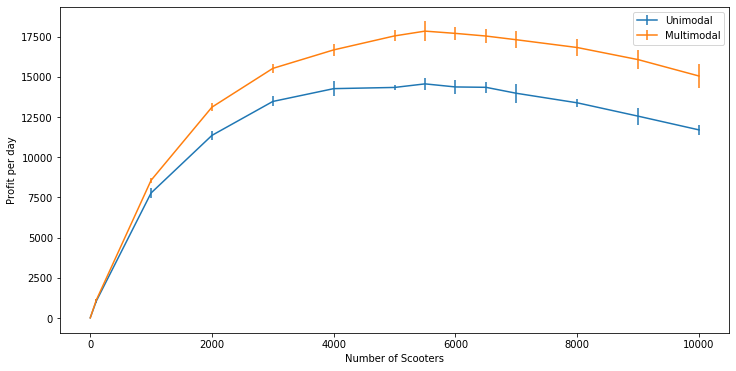

In [3]:
mean_uni = profits_uni.mean(axis=1)
error_uni = profits_uni.std(axis=1)
mean_multi = profits_multi.mean(axis=1)
error_multi = profits_multi.std(axis=1)
plt.figure(figsize=(12,6))
plt.errorbar(sample_nums, mean_uni, yerr = error_uni, label='Unimodal')
plt.errorbar(sample_nums, mean_multi, yerr = error_multi, label='Multimodal')
plt.legend()
plt.xlabel('Number of Scooters')
plt.ylabel('Profit per day')
plt.show()

Next we look at how initial positioning affects profit

In [4]:
number_reruns = 10
number_of_scooters = 6000
sample_nums = [1/100, 1/10, 1/5, 1/4 ,1/3, 1/2.5, 1/2, 1/1.5, 1, 2]
profits_uni = np.zeros((len(sample_nums), number_reruns))
profits_multi = np.zeros((len(sample_nums), number_reruns))
profits_multi_multi_init = np.zeros((len(sample_nums), number_reruns))
for i, radius_scal in enumerate(sample_nums):
    np.random.seed(1)
    size = (51,51)
    base_pop = 1500
    time_demand = create_time_demand()
    start_time = 6
    city_uni = City(size, base_pop, time_demand, multimodal=False)
    city_multi = City(size, base_pop, time_demand, multimodal=True)
    
    for j in range(number_reruns):
        initial_positions = gaussian_inital_positions(city_uni, number_of_scooters, radius_scal=radius_scal)
        data = city_uni.simulate_day(initial_positions, start_time)
        fixed_costs, variable_costs, sales = compute_profit(data)
        profits_uni[i][j] = sales - fixed_costs - variable_costs

        initial_positions = gaussian_inital_positions(city_multi, number_of_scooters, radius_scal=radius_scal)
        data = city_multi.simulate_day(initial_positions, start_time)
        fixed_costs, variable_costs, sales = compute_profit(data)
        profits_multi[i][j] = sales - fixed_costs - variable_costs
        
        initial_positions = multivariate_gaussian_inital_positions(city_multi, number_of_scooters, radius_scal=radius_scal)
        data = city_multi.simulate_day(initial_positions, start_time)
        fixed_costs, variable_costs, sales = compute_profit(data)
        profits_multi_multi_init[i][j] = sales - fixed_costs - variable_costs

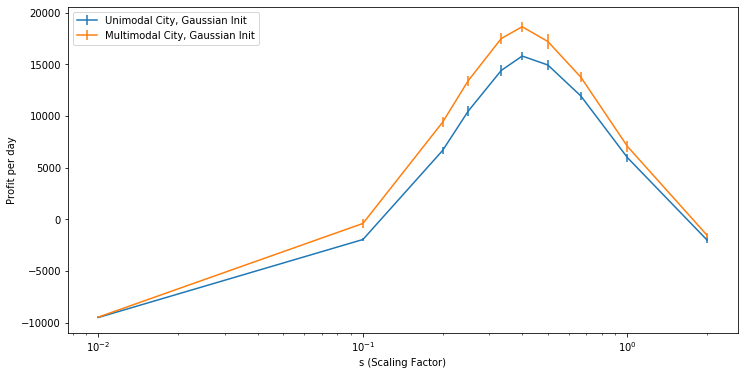

In [6]:
mean_uni = profits_uni.mean(axis=1)
error_uni = profits_uni.std(axis=1)
mean_multi = profits_multi.mean(axis=1)
error_multi = profits_multi.std(axis=1)
#mean_multi_multi = profits_multi_multi_init.mean(axis=1)
#error_multi_multi = profits_multi_multi_init.std(axis=1)
plt.figure(figsize=(12,6))
plt.errorbar(sample_nums, mean_uni, yerr = error_uni, label='Unimodal City, Gaussian Init')
plt.errorbar(sample_nums, mean_multi, yerr = error_multi, label='Multimodal City, Gaussian Init')
#plt.errorbar(sample_nums, mean_multi_multi, yerr = error_multi_multi, label='Multimodal City, Mixture Init')
plt.legend()
plt.xlabel('s (Scaling Factor)')
plt.ylabel('Profit per day')
plt.xscale('log')
plt.show()